In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [11]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 数据集简单介绍
1. 这是一个信用卡欺诈的数据，一共有31列，其中Time 这一列没什么用后面会去掉
2. V1-V28 表示的是实际的数据经过处理后的样子(信用卡欺诈数据为了考虑到用户的隐私,隐藏了列的实际含义)，并且此处的数据是经过降维预处理后的了
3. Amount代表的是交易的金额，可以看出Amount的值和我们的V1-V28值差距比较大，一会肯定需要归一化处理的！
4. 最后一列class是数据类别，这是一个二分类的任务，其中0表示正样本（未被欺诈），1是一个负样本（被欺诈了）

### 拿到样本后
首先我们思考在正常业务中，未被欺诈的数据也就是我们说的正样本数目一定是远远大于负样本的数据的，所以我们首先来验证实际是否是这样

Text(0,0.5,'Frequency')

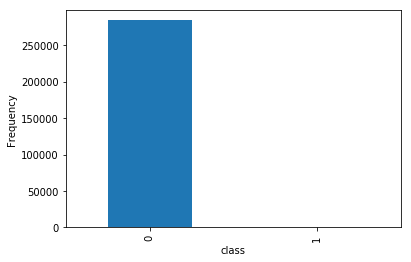

In [12]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('Frequency')

In [13]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

### 样本不均衡的处理
1. 我们可以看到样本是极度不均衡的
2. 在样本极度不均衡的时候，一般我们有两种考虑的角度：（采样在书本的后面章节会详细讲到）
    - 下采样：比如在此处，1的样本只有492个，那么我们让0也差不多是这个数量级的就叫做下采样
    - 过采样：比如在此处，1不够，我们自己生成20多万的数据，让0和1保持一个数量级
    - 下采样：让数据同样少
    - 过采样：让数据同样多

### 数据分布不均匀处理
很明显，Amount这一列数据分布很不均匀，我们将它进行归一化/标准化处理

In [14]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 先试试下采样

In [15]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# 拿出样本为1的数量
number_records_fraud = len(data[data.Class == 1])
# 取出0/1在样本中的索引
fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = np.array(data[data.Class != 1].index)

# 在正常的样本中随机挑选和负样本相同数量的样本
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# 我们将我们随机挑出来的正样本（0：正常）和原本的负样本（1：异常）的索引融合
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# 根据索引我们把数据拿出来
under_sample_data = data.iloc[under_sample_indices,:]

# 我们取出X和y
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']
print("  样本总数为{0}个".format(len(under_sample_data)))
print("  正样本占比为：{0}，负样本占比为：{1}".format(
    len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data),
    len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data)
))

  样本总数为984个
  正样本占比为：0.5，负样本占比为：0.5


### 交叉验证部分


In [22]:
from sklearn.model_selection import train_test_split

# 对原始的数据集进行切分
# 此处可能有有疑问为什么要对原始的数据集切分？
# 因为我们下采样的数据集可能改变了原始数据的分布，所以我们的测试数据集还是要使用原数据分割数来的
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 对下采样的数据集进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, 
                                                                                                     y_undersample, 
                                                                                                     test_size=0.3, 
                                                                                                     random_state=666)
            

In [23]:
len(X_train_undersample)

688

In [24]:
len(y_test)

85443

### 实际训练调参
下面我们进行交叉验证，选择5倍交叉验证，然后使用L1正则，并对不同的正则系数产生的结果进行调参

In [25]:
# 引入一些需要用到的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [61]:
def printing_Kfold_scores(x_train_data, y_train_data):
    # 我们进行一个5倍的交叉验证
    fold = KFold(5)
    
    # 正则化系数的选择，我们通过不同的正则化系数，找到一个最优的作为我们模型的正则化系数
    c_param_range = [0.01, 0.1, 1, 10, 1000]
    
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # Kfold将返回两个list，其中train_indices=indices[0]  test_indices=indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        
        # 存放每个交叉验证的recall_acc
        recall_accs = []
        
        for iteration, indices in enumerate(fold.split(x_train_data), start=1):
            # 实例化一个逻辑回归类，并且将我们的正则化系数传入进去，并且选择使用L1/L2正则
            lr = LogisticRegression(C=c_param, penalty='l1')
            # 拟合一下
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            # 进行预测
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            # 进行模型评估
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
        
        # 我们来计算平均值
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    # 我们取出最好的正则化系数
    results_table['Mean recall score'] = results_table['Mean recall score'].astype('float64')
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # 最终打印出最好的正则化系数是
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c
            

In [62]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.96
Iteration  2 : recall score =  0.9855072463768116
Iteration  3 : recall score =  0.9152542372881356
Iteration  4 : recall score =  0.9733333333333334
Iteration  5 : recall score =  0.9705882352941176

Mean recall score  0.9609366104584798

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8666666666666667
Iteration  2 : recall score =  0.9565217391304348
Iteration  3 : recall score =  0.847457627118644
Iteration  4 : recall score =  0.92
Iteration  5 : recall score =  0.8382352941176471

Mean recall score  0.8857762654066784

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8933333333333333
Iteration  2 : recall score =  0.9855072463768116
Iteration  3 : recall score =

### 混淆矩阵
找出了最优的正则化系数，我们终于可以开始训练了，我们进行训练，并打印出来混淆矩阵

In [65]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9452054794520548


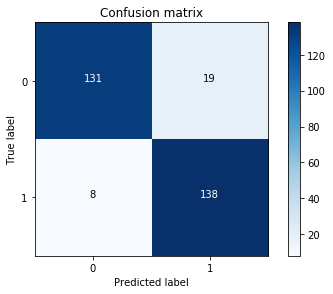

In [66]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 结果分析
我们可以看到经过我们的训练，得到的召回率还不错（为什么不谈准确率，因为在这个极度不平衡的样本中，召回率是我们更关系的事，准确率即使你全部选择是正样本也不会太低）
### 接下来我们测试一下在未下采样之前的样本数效果怎么样


Recall metric in the testing dataset:  0.9419354838709677


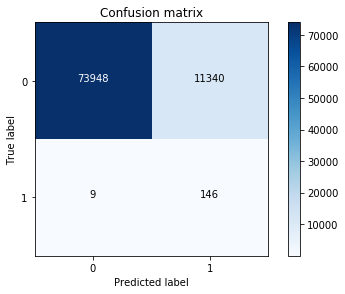

In [67]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 未下采样样本测试结果分析
我们可以看到，实际上召回率效果还是不错的，但是我们找到的负样本里面，有11340个是错误的，这对我们的准确率产生了极大的影响，而且实际中要在一万多个样本中验证找出大概100多个样本交易异常，也是蛮困难的

### 我们看一下直接对原样本建模会怎么样

In [68]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.53125
Iteration  2 : recall score =  0.5822784810126582
Iteration  3 : recall score =  0.49206349206349204
Iteration  4 : recall score =  0.5333333333333333
Iteration  5 : recall score =  0.5633802816901409

Mean recall score  0.5404611176199249

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.578125
Iteration  2 : recall score =  0.6455696202531646
Iteration  3 : recall score =  0.5714285714285714
Iteration  4 : recall score =  0.65
Iteration  5 : recall score =  0.6056338028169014

Mean recall score  0.6101513988997275

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.59375
Iteration  2 : recall score =  0.6708860759493671
Iteration  3 : recall score =  0.587301587301

Recall metric in the testing dataset:  0.6064516129032258


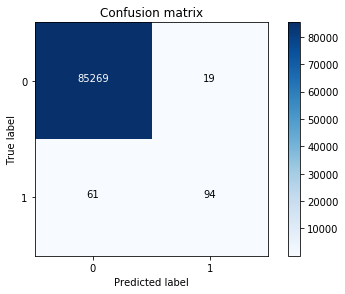

In [69]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 为采样之前样本实验结果分析
我们可以看到，直接建模召回率还是比较低的

### 我们再来看一下逻辑回归的阈值对我们的效果的影响

threshold is  0.1   Recall metric in the testing dataset:  1.0
threshold is  0.2   Recall metric in the testing dataset:  1.0
threshold is  0.3   Recall metric in the testing dataset:  1.0
threshold is  0.4   Recall metric in the testing dataset:  0.9863013698630136
threshold is  0.5   Recall metric in the testing dataset:  0.9452054794520548
threshold is  0.6   Recall metric in the testing dataset:  0.8835616438356164
threshold is  0.7   Recall metric in the testing dataset:  0.8698630136986302
threshold is  0.8   Recall metric in the testing dataset:  0.7945205479452054
threshold is  0.9   Recall metric in the testing dataset:  0.5616438356164384


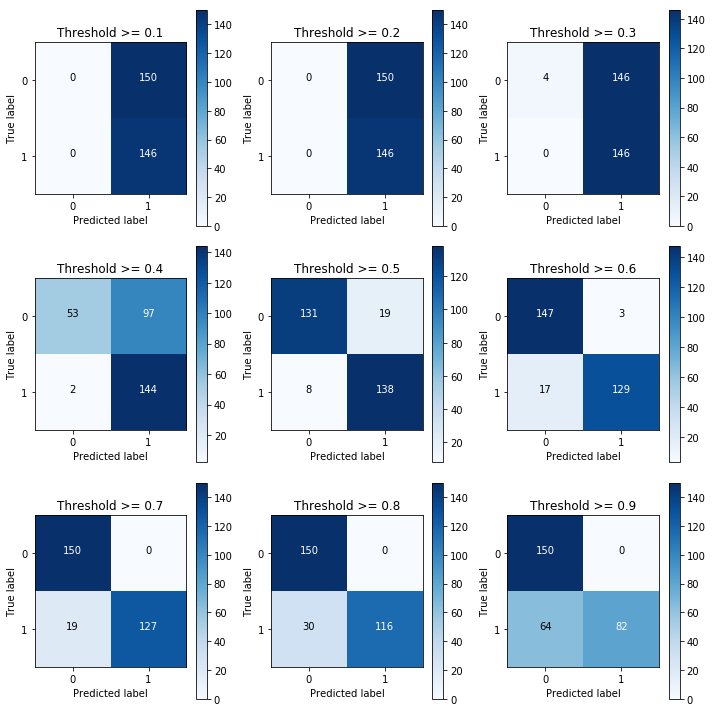

In [71]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
# 注意此处我们用的不是predict了，还记得我们实战中自己封装的逻辑回归吗，这里是直接返回具体的预测概率
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("threshold is ", i
          ,"  Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

### 通过上图分析我们可以直观的看到阈值对结果的影响

### 最后我们总结一下
- 看一个模型的效果，我们要从多个角度结合实际取评估，不能仅仅局限于某些个指标
- 关于过采样的部分，实际上我们会通过SMOTE算法来进行生成，具体在本书第8节会讲到采样部分，到时候我们会详细讲到这部分